In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def score_f(row):
    return (3*row.kills) + (2*row.assists) + (0.02*row['total cs']) + (2*row.firstbloodkill) + (2*(row.triplekills-row.quadrakills)) + (4*(row.quadrakills-row.pentakills)) + (7*row.pentakills) - row.deaths


In [3]:
data = pd.read_csv('aggregation_data.csv', index_col = 'Unnamed: 0')

C:\Users\IsDan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
1440,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,1,Blue,top,Kingen,oe:player:618a87d272773f68239d8ce5555f39d,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Graves,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,0,5,1,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,18483.0,505.2301,0.369379,474.5877,645.1298,11.0,0.3007,5.0,0.1367,9.0,35.0,0.9567,13189.0,8435.0,230.5695,0.210996,12875.0,NaN,315.0,270.0,45.0,NaN,NaN,8.6105,3170.0,4619.0,83.0,3223.0,4640.0,89.0,-53.0,-21.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,4763.0,6943.0,127.0,4965.0,7658.0,135.0,-202.0,-715.0,-8.0,0.0,0.0,1.0,0.0,1.0,0.0
1441,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,2,Blue,jng,Pyosik,oe:player:a2357eb17578485c2ba736db36cbc42,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Viego,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,1,3,2,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3799.0,103.8451,0.075922,640.0456,568.0182,13.0,0.3554,15.0,0.4100,13.0,58.0,1.5854,10792.0,6038.0,165.0478,0.151037,10375.0,NaN,178.0,27.0,151.0,NaN,NaN,4.8656,3075.0,3131.0,63.0,3036.0,3180.0,64.0,39.0,-49.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,5107.0,5355.0,89.0,4867.0,5626.0,104.0,240.0,-271.0,-15.0,1.0,2.0,0.0,1.0,0.0,1.0
1442,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,3,Blue,mid,Zeka,oe:player:f9cd2ef9afea5cda0eb3263a025cec1,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Ryze,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,0,2,0,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7658.0,209.3303,0.153044,490.6879,271.6811,19.0,0.5194,5.0,0.1367,7.0,39.0,1.0661,14226.0,9472.0,258.9157,0.236936,14075.0,NaN,351.0,304.0,47.0,NaN,NaN,9.5945,3361.0,4914.0,92.0,3326.0,4770.0,91.0,35.0,144.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5589.0,7592.0,144.0,5151.0,7796.0,151.0,438.0,-204.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0
1443,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,4,Blue,bot,Deft,oe:player:c588a2d07b69ca4ba61c96aebd3f793,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Aphelios,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,3,2,2,5,14,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15003.0,410.1048,0.299832,302.7062,46

In [5]:
data.iloc[0:5,22:24]

,ban5,gamelength
1440,Viktor,2195
1441,Viktor,2195
1442,Viktor,2195
1443,Viktor,2195
1444,Viktor,2195


In [6]:
data['score'] = data.apply(lambda row: score_f(row), axis=1)

In [7]:
aggs= data.groupby(['playerid', 'date'])[['killsat15', 'deathsat15', 'assistsat15', 'total cs', 'score',
                                            'firstbloodkill', 'triplekills', 'quadrakills', 'pentakills', 'gamelength',
                                            'visionscore']].sum()

aggs.head()

killsat15  \
playerid                                  date                             
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32        0.0   
                                          2021-06-13 08:37:44        0.0   
                                          2021-06-16 10:41:14        0.0   
                                          2021-06-16 12:06:52        0.0   
                                          2021-06-16 13:04:50        1.0   

                                                               deathsat15  \
playerid                                  date                              
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32         0.0   
                                          2021-06-13 08:37:44         0.0   
                                          2021-06-16 10:41:14         3.0   
                                          2021-06-16 12:06:52         0.0   
                                          2021-06-16 13:04:50         1.0   

                                                               assistsat15  \
playerid                                  date                               
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32          2.0   
                                          2021-06-13 08:37:44          4.0   
                                          2021-06-16 10:41:14          2.0   
                                          2021-06-16 12:06:52          1.0   
                                          2021-06-16 13:04:50          0.0   

                                                               total cs  \
playerid                                  date                            
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32      41.0   
                                          2021-06-13 08:37:44     182.0   
                                          2021-06-16 10:41:14      25.0   
                                          2021-06-16 12:06:52      27.0   
                                          2021-06-16 13:04:50      31.0   

                                                               score  \
playerid                                  date                         
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32  32.82   
                                          2021-06-13 08:37:44  27.64   
                                          2021-06-16 10:41:14   5.50   
                                          2021-06-16 12:06:52  15.54   
                                          2021-06-16 13:04:50  13.62   

                                                               firstbloodkill  \
playerid                                  date                                  
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32             0.0   
                                          2021-06-13 08:37:44             0.0   
                                          2021-06-16 10:41:14             0.0   
                                          2021-06-16 12:06:52             0.0   
                                          2021-06-16 13:04:50             1.0   

                                                               triplekills  \
playerid                                  date                               
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32          0.0   
                                          2021-06-13 08:37:44          0.0   
                                          2021-06-16 10:41:14          0.0   
                                          2021-06-16 12:06:52          0.0   
                                          2021-06-16 13:04:50          0.0   

                                                               quadrakills  \
playerid                                  date                               
oe:player:0015d99e65183977a9e65547b37f1cb 2021-06-13 05:55:32          0.0   
                                          2021-06-13 08:37:44  

In [8]:
cols = list(aggs.columns)
renamer = {}
for col in cols:
    renamer[col] = 'average_'+col
renamer['total cs'] = 'average_cs'

games = data.groupby(['playerid', 'date'])[['playerid']].count()
aggs = pd.merge(aggs, games, left_index=True, right_index=True, how='inner')

renamer['playerid'] = 'total_games'

aggs = aggs.groupby(level=0).cumsum().rename(columns=renamer)
aggs = aggs.groupby(level=0).shift(1)

for i in renamer.values():
    if i != 'total_games':
        aggs[i] = aggs[i]/aggs['total_games']
        
aggs['total_games'].fillna(0, inplace=True)
aggs.fillna(-1, inplace=True)
agg_cols = list(aggs.columns)
aggs.reset_index(inplace=True)
aggs.loc[:,'date'] = pd.to_datetime(aggs.date)

In [9]:
aggs.head()

,playerid,date,average_killsat15,average_deathsat15,average_assistsat15,average_cs,average_score,average_firstbloodkill,average_triplekills,average_quadrakills,average_pentakills,average_gamelength,average_visionscore,total_games
0,oe:player:0015d99e65183977a9e65547b37f1cb,2021-06-13 05:55:32,-1.0,-1.00,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.00,0.0
1,oe:player:0015d99e65183977a9e65547b37f1cb,2021-06-13 08:37:44,0.0,0.00,2.000000,41.000000,32.820000,0.0,0.0,0.0,0.0,1677.000000,60.00,1.0
2,oe:player:0015d99e65183977a9e65547b37f1cb,2021-06-16 10:41:14,0.0,0.00,3.000000,111.500000,30.230000,0.0,0.0,0.0,0.0,1728.000000,47.00,2.0
3,oe:player:0015d99e65183977a9e65547b37f1cb,2021-06-16 12:06:52,0.0,1.00,2.666667,82.666667,21.986667,0.0,0.0,0.0,0.0,1633.333333,46.00,3.0
4,oe:player:0015d99e65183977a9e65547b37f1cb,2021-06-16 13:04:50,0.0,0.75,2.250000,68.750000,20.375000,0.0,0.0,0.0,0.0,1751.500000,53.25,4.0


In [10]:
aggs.playerid.nunique()

809

In [11]:
games = pd.read_csv('ml_data.csv', index_col = 'Unnamed: 0')

C:\Users\IsDan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
games.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,side_pos
1440,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,1,Blue,top,Kingen,oe:player:618a87d272773f68239d8ce5555f39d,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Graves,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,0,5,1,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,18483.0,505.2301,0.369379,474.5877,645.1298,11.0,0.3007,5.0,0.1367,9.0,35.0,0.9567,13189.0,8435.0,230.5695,0.210996,12875.0,NaN,315.0,270.0,45.0,NaN,NaN,8.6105,3170.0,4619.0,83.0,3223.0,4640.0,89.0,-53.0,-21.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,4763.0,6943.0,127.0,4965.0,7658.0,135.0,-202.0,-715.0,-8.0,0.0,0.0,1.0,0.0,1.0,0.0,Bluetop
1441,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,2,Blue,jng,Pyosik,oe:player:a2357eb17578485c2ba736db36cbc42,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Viego,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,1,3,2,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3799.0,103.8451,0.075922,640.0456,568.0182,13.0,0.3554,15.0,0.4100,13.0,58.0,1.5854,10792.0,6038.0,165.0478,0.151037,10375.0,NaN,178.0,27.0,151.0,NaN,NaN,4.8656,3075.0,3131.0,63.0,3036.0,3180.0,64.0,39.0,-49.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,5107.0,5355.0,89.0,4867.0,5626.0,104.0,240.0,-271.0,-15.0,1.0,2.0,0.0,1.0,0.0,1.0,Bluejng
1442,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,3,Blue,mid,Zeka,oe:player:f9cd2ef9afea5cda0eb3263a025cec1,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Ryze,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,0,2,0,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7658.0,209.3303,0.153044,490.6879,271.6811,19.0,0.5194,5.0,0.1367,7.0,39.0,1.0661,14226.0,9472.0,258.9157,0.236936,14075.0,NaN,351.0,304.0,47.0,NaN,NaN,9.5945,3361.0,4914.0,92.0,3326.0,4770.0,91.0,35.0,144.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5589.0,7592.0,144.0,5151.0,7796.0,151.0,438.0,-204.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,Bluemid
1443,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,4,Blue,bot,Deft,oe:player:c588a2d07b69ca4ba61c96aebd3f793,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Aphelios,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,3,2,2,5,14,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1500

In [13]:
games['score'] = games.apply(lambda row: score_f(row), axis=1)
games.dropna(subset=['score'], inplace=True)

scores = games.groupby(['playerid', 'gameid'])[['score']].sum().reset_index()
scores.head()

,playerid,gameid,score
0,oe:player:0015d99e65183977a9e65547b37f1cb,ESPORTSTMNT01_2136240,9.70
1,oe:player:0015d99e65183977a9e65547b37f1cb,ESPORTSTMNT01_2136284,-0.24
2,oe:player:0015d99e65183977a9e65547b37f1cb,ESPORTSTMNT01_2136290,15.56
3,oe:player:0015d99e65183977a9e65547b37f1cb,ESPORTSTMNT01_2137369,-3.34
4,oe:player:0015d99e65183977a9e65547b37f1cb,ESPORTSTMNT01_2137440,12.80


In [36]:
COLOR = 'gold'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams.update({'font.size': 10})

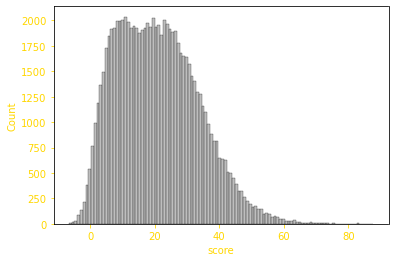

In [43]:
sns.histplot(data=scores, x='score', color='darkgrey' )
plt.figsize=(20,10)
#plt.grid(b=None)

plt.savefig('score_dist.png',  transparent=True,bbox_inches='tight')

plt.show()

In [15]:
games.isna().sum()

gameid                          0
datacompleteness                0
url                          4030
league                          0
year                            0
split                        1890
playoffs                        0
date                            0
game                            0
patch                        1440
participantid                   0
side                            0
position                        0
playername                      0
playerid                        0
teamname                        0
teamid                        510
champion                        0
ban1                          200
ban2                          120
ban3                          205
ban4                        24395
ban5                        24550
gamelength                      0
result                          0
kills                           0
deaths                          0
assists                         0
teamkills                       0
teamdeaths    

In [16]:
games.loc[:,'date'] = pd.to_datetime(games.date)
games['week'] = games.date.dt.isocalendar()['week']
avg_scores = games.groupby(['league', 'year', 'week','position', 'playerid'])[['score']].mean().reset_index()
max_scores = avg_scores.groupby(['league', 'year', 'week', 'position'])[['score']].max().reset_index().rename(columns={'score':'max_score'})
max_scores.head(20)

,league,year,week,position,max_score
0,EU LCS,2014,3,bot,46.233333
1,EU LCS,2014,3,jng,27.190000
2,EU LCS,2014,3,mid,39.573333
3,EU LCS,2014,3,sup,27.273333
4,EU LCS,2014,3,top,33.740000
5,EU LCS,2014,4,bot,38.560000
6,EU LCS,2014,4,jng,30.130000
7,EU LCS,2014,4,mid,36.780000
8,EU LCS,2014,4,sup,21.060000
9,EU LCS,2014,4,top,30.160000


In [17]:
games = pd.merge(games, max_scores, on=['league', 'year', 'week', 'position'], how='left' )

games.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,side_pos,score,week,max_score
0,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,1,Blue,top,Kingen,oe:player:618a87d272773f68239d8ce5555f39d,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Graves,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,0,5,1,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,18483.0,505.2301,0.369379,474.5877,645.1298,11.0,0.3007,5.0,0.1367,9.0,35.0,0.9567,13189.0,8435.0,230.5695,0.210996,12875.0,NaN,315.0,270.0,45.0,NaN,NaN,8.6105,3170.0,4619.0,83.0,3223.0,4640.0,89.0,-53.0,-21.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,4763.0,6943.0,127.0,4965.0,7658.0,135.0,-202.0,-715.0,-8.0,0.0,0.0,1.0,0.0,1.0,0.0,Bluetop,3.30,2,30.144
1,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,2,Blue,jng,Pyosik,oe:player:a2357eb17578485c2ba736db36cbc42,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Viego,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,1,3,2,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3799.0,103.8451,0.075922,640.0456,568.0182,13.0,0.3554,15.0,0.4100,13.0,58.0,1.5854,10792.0,6038.0,165.0478,0.151037,10375.0,NaN,178.0,27.0,151.0,NaN,NaN,4.8656,3075.0,3131.0,63.0,3036.0,3180.0,64.0,39.0,-49.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,5107.0,5355.0,89.0,4867.0,5626.0,104.0,240.0,-271.0,-15.0,1.0,2.0,0.0,1.0,0.0,1.0,Bluejng,7.56,2,33.548
2,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,3,Blue,mid,Zeka,oe:player:f9cd2ef9afea5cda0eb3263a025cec1,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Ryze,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,0,2,0,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7658.0,209.3303,0.153044,490.6879,271.6811,19.0,0.5194,5.0,0.1367,7.0,39.0,1.0661,14226.0,9472.0,258.9157,0.236936,14075.0,NaN,351.0,304.0,47.0,NaN,NaN,9.5945,3361.0,4914.0,92.0,3326.0,4770.0,91.0,35.0,144.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5589.0,7592.0,144.0,5151.0,7796.0,151.0,438.0,-204.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,Bluemid,5.02,2,34.948
3,ESPORTSTMNT01_2700815,complete,NaN,LCK,2022,Spring,0,2022-01-12 06:20:03,1,12.01,4,Blue,bot,Deft,oe:player:c588a2d07b69ca4ba61c96aebd3f793,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,Aphelios,Diana,Caitlyn,Twisted Fate,LeBlanc,Viktor,2195,0,3,2,2,5,14,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1367,0.5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [18]:
game_data = games.pivot(index=['gameid', 'date'], columns='side_pos', values='playerid').reset_index()
#game_data.index.names = ['index']
score_data = games.pivot(index=['gameid', 'date'], columns='side_pos', values='max_score').reset_index()
side_pos_list = games.side_pos.unique()
names = ['max_score_'+x for x in side_pos_list]
renames = dict(zip(side_pos_list, names))
score_data.rename(columns=renames, inplace=True)
game_data = pd.merge(game_data, score_data, on=['gameid', 'date'], how='inner')
game_data.head(50)

side_pos,gameid,date,Bluebot,Bluejng,Bluemid,Bluesup,Bluetop,Redbot,Redjng,Redmid,Redsup,Redtop,max_score_Bluebot,max_score_Bluejng,max_score_Bluemid,max_score_Bluesup,max_score_Bluetop,max_score_Redbot,max_score_Redjng,max_score_Redmid,max_score_Redsup,max_score_Redtop
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:9405c3aff9112c3c60d03b94792877d,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:b0ec3df39d61f953e7af0afd8eb8c4a,oe:player:310e4ace014984819dd016f4bd7e763,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915
1,ESPORTSTMNT01/1031972,2019-01-19 11:38:58,oe:player:a7f8ce07e216556a999d52ab7f06594,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:c4a5196a4f7e430cf448a76adadb028,oe:player:310e4ace014984819dd016f4bd7e763,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915
2,ESPORTSTMNT01/1032162,2019-01-20 07:36:47,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,oe:player:78081d0b3c01f1f295d52d53744261a,oe:player:e35d06a0430095562086a40a2676d8e,oe:player:1d22c812efd7b8a4244d93c51acc399,oe:player:0923739b522ef9fc94428a92c255531,oe:player:99ce2ea4de279c28bb0315848da8a48,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915
3,ESPORTSTMNT01/1032172,2019-01-20 08:58:30,oe:player:78081d0b3c01f1f295d52d53744261a,oe:player:e35d06a0430095562086a40a2676d8e,oe:player:1d22c812efd7b8a4244d93c51acc399,oe:player:0923739b522ef9fc94428a92c255531,oe:player:99ce2ea4de279c28bb0315848da8a48,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a2a0d7ab33e23da9a23c463f697f82c,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915
4,ESPORTSTMNT01/1032839,2019-01-23 07:20:06,oe:player:69abfbec6354b4d570ded67d2d59585,oe:player:5dd135d1bcfa7f63c3b7f25425c2a4a,oe:player:30361653a485a9609fb2d3aa073282c,oe:player:b46cf7715e2fe895a9153a650308fff,oe:player:0906d77d4804d5ba6d0c0a7bcf707da,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,35.940,29.285,34.935,25.540,30.035,35.940,29.285,34.935,25.540,30.035
5,ESPORTSTMNT01/1032853,2019-01-23 09:03:46,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,oe:player:479bf0803cf7122f9d77ebf7bfb7576,oe:player:5dd135d1bcfa7f63c3b7f25425c2a4a,oe:player:30361653a485a9609fb2d3aa073282c,oe:player:b46cf7715e2fe895a9153a650308fff,oe:player:0906d77d4804d5ba6d0c0a7bcf707da,35.940,29.285,34.935,25.540,30.035,35.940,29.285,34.935,25.540,30.035
6,ESPORTSTMNT01/1032906,2019-01-23 11:56:54,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:887b308d89aa7ff0f3ff21a1c29f588,oe:player:37a18aea52f7509729362a4b97a6ce7,oe:player:1d18fe2cdd43a72d46421ecfe81b599,oe:player:897356954c2cd3d41b221e3f24f99bb,oe:player:06f871352444da0cbc5769be21a42fb,35.940,29.285,34.935,25.540,30.035,35.940,29.285,34.935,25.54

In [19]:
game_data = game_data.reindex(columns = list(game_data.columns)+agg_cols+['score'])
game_data.head()

side_pos,gameid,date,Bluebot,Bluejng,Bluemid,Bluesup,Bluetop,Redbot,Redjng,Redmid,Redsup,Redtop,max_score_Bluebot,max_score_Bluejng,max_score_Bluemid,max_score_Bluesup,max_score_Bluetop,max_score_Redbot,max_score_Redjng,max_score_Redmid,max_score_Redsup,max_score_Redtop,average_killsat15,average_deathsat15,average_assistsat15,average_cs,average_score,average_firstbloodkill,average_triplekills,average_quadrakills,average_pentakills,average_gamelength,average_visionscore,total_games,score
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:9405c3aff9112c3c60d03b94792877d,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:b0ec3df39d61f953e7af0afd8eb8c4a,oe:player:310e4ace014984819dd016f4bd7e763,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESPORTSTMNT01/1031972,2019-01-19 11:38:58,oe:player:a7f8ce07e216556a999d52ab7f06594,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:c4a5196a4f7e430cf448a76adadb028,oe:player:310e4ace014984819dd016f4bd7e763,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESPORTSTMNT01/1032162,2019-01-20 07:36:47,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,oe:player:78081d0b3c01f1f295d52d53744261a,oe:player:e35d06a0430095562086a40a2676d8e,oe:player:1d22c812efd7b8a4244d93c51acc399,oe:player:0923739b522ef9fc94428a92c255531,oe:player:99ce2ea4de279c28bb0315848da8a48,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESPORTSTMNT01/1032172,2019-01-20 08:58:30,oe:player:78081d0b3c01f1f295d52d53744261a,oe:player:e35d06a0430095562086a40a2676d8e,oe:player:1d22c812efd7b8a4244d93c51acc399,oe:player:0923739b522ef9fc94428a92c255531,oe:player:99ce2ea4de279c28bb0315848da8a48,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a2a0d7ab33e23da9a23c463f697f82c,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ESPORTSTMNT01/1032839,2019-01-23 07:20:06,oe:player:69abfbec6354b4d570ded67d2d59585,oe:player:5dd135d1bcfa7f63c3b7f25425c2a4a,oe:player:30361653a485a9609fb2d3aa073282c,oe:player:b46cf7715e2fe895a9153a650308fff,oe:player:0906d77d4804d5ba6d0c0a7bcf707da,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,35.940,29.285,34.935,25.540,30.035,35.940,29.285,34.935,25.540,30.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
side_pos_list

array(['Bluetop', 'Bluejng', 'Bluemid', 'Bluebot', 'Bluesup', 'Redtop',
       'Redjng', 'Redmid', 'Redbot', 'Redsup'], dtype=object)

In [21]:
test = pd.merge(game_data, aggs, left_on=['Bluebot', 'date'], right_on=['playerid', 'date'],
                       how='left', suffixes=('','_'+'Bluebot' )).drop(columns='playerid')
test = pd.merge(test, scores, left_on=['Bluebot', 'gameid'], right_on=['playerid', 'gameid'],
                       how='left', suffixes=('','_'+'Bluebot' )).drop(columns='playerid')
test.head()

,gameid,date,Bluebot,Bluejng,Bluemid,Bluesup,Bluetop,Redbot,Redjng,Redmid,Redsup,Redtop,max_score_Bluebot,max_score_Bluejng,max_score_Bluemid,max_score_Bluesup,max_score_Bluetop,max_score_Redbot,max_score_Redjng,max_score_Redmid,max_score_Redsup,max_score_Redtop,average_killsat15,average_deathsat15,average_assistsat15,average_cs,average_score,average_firstbloodkill,average_triplekills,average_quadrakills,average_pentakills,average_gamelength,average_visionscore,total_games,score,average_killsat15_Bluebot,average_deathsat15_Bluebot,average_assistsat15_Bluebot,average_cs_Bluebot,average_score_Bluebot,average_firstbloodkill_Bluebot,average_triplekills_Bluebot,average_quadrakills_Bluebot,average_pentakills_Bluebot,average_gamelength_Bluebot,average_visionscore_Bluebot,total_games_Bluebot,score_Bluebot
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:9405c3aff9112c3c60d03b94792877d,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:b0ec3df39d61f953e7af0afd8eb8c4a,oe:player:310e4ace014984819dd016f4bd7e763,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.296875,0.578125,373.687500,25.520625,0.093750,0.062500,0.000000,0.000000,2147.140625,46.843750,64.0,31.08
1,ESPORTSTMNT01/1031972,2019-01-19 11:38:58,oe:player:a7f8ce07e216556a999d52ab7f06594,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:c4a5196a4f7e430cf448a76adadb028,oe:player:310e4ace014984819dd016f4bd7e763,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,0.481481,0.555556,347.555556,20.358519,0.000000,0.037037,0.037037,0.037037,2356.666667,1.333333,27.0,0.62
2,ESPORTSTMNT01/1032162,2019-01-20 07:36:47,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,oe:player:78081d0b3c01f1f295d52d53744261a,oe:player:e35d06a0430095562086a40a2676d8e,oe:player:1d22c812efd7b8a4244d93c51acc399,oe:player:0923739b522ef9fc94428a92c255531,oe:player:99ce2ea4de279c28bb0315848da8a48,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401914,0.277512,0.722488,355.244019,23.970909,0.105263,0.066986,0.000000,0.000000,2180.267943,37.157895,209.0,29.80
3,ESPORTSTMNT01/1032172,2019-01-20 08:58:30,oe:player:78081d0b3c01f1f295d52d53744261a,oe:player:e35d06a0430095562086a40a2676d8e,oe:player:1d22c812efd7b8a4244d93c51acc399,oe:player:0923739b522ef9fc94428a92c255531,oe:player:99ce2ea4de279c28bb0315848da8a48,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a2a0d7ab33e23da9a23c463f697f82c,oe:player:45fa65486c55c031328f189912bbe4b,oe:player:9daf04bfd9c8815cc827414f59f45af,34.675,34.715,30.635,26.495,31.915,34.675,34.715,30.635,26.495,31.915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366492,0.345550,0.497382,351.816754,19.690785,0.109948,0.062827,0.020942,0.005236,2205.910995,34.570681,191.0,29.50
4,ESPORTSTMNT01/1032839,2019-01-23 07:20:06,oe:player:69abfbec6354b4d570ded67d2d59585,oe:player:5dd135d1bcfa7f63c3b7f25425c2a4a,oe:player:30361653a485a9609fb2d3aa073282c,oe:player:b46cf7715e2fe895a9153a650308fff,oe:player:0906d77d4804d5ba6d0c0a7bcf707da,oe:player:c588a2d07b69ca4ba61c96aebd3f793,oe:player:f9fe6d28d5b67bf9ac673b2cc8edf15,oe:player:a442058c6da103458f122260082b7bc

In [ ]:
sns.histplot(data=test, x='score', )

In [22]:
for col in side_pos_list:
    
    game_data = pd.merge(game_data, aggs, left_on=[col, 'date'], right_on=['playerid', 'date'],
                       how='left', suffixes=('','_'+col )).drop(columns='playerid')
    
    game_data = pd.merge(game_data, scores, left_on=[col, 'gameid'], right_on=['playerid', 'gameid'],
                       how='left', suffixes=('','_'+col )).drop(columns='playerid')


In [23]:
game_data.head()

,gameid,date,Bluebot,Bluejng,Bluemid,Bluesup,Bluetop,Redbot,Redjng,Redmid,Redsup,Redtop,max_score_Bluebot,max_score_Bluejng,max_score_Bluemid,max_score_Bluesup,max_score_Bluetop,max_score_Redbot,max_score_Redjng,max_score_Redmid,max_score_Redsup,max_score_Redtop,average_killsat15,average_deathsat15,average_assistsat15,average_cs,average_score,average_firstbloodkill,average_triplekills,average_quadrakills,average_pentakills,average_gamelength,average_visionscore,total_games,score,average_killsat15_Bluetop,average_deathsat15_Bluetop,average_assistsat15_Bluetop,average_cs_Bluetop,average_score_Bluetop,average_firstbloodkill_Bluetop,average_triplekills_Bluetop,average_quadrakills_Bluetop,average_pentakills_Bluetop,average_gamelength_Bluetop,average_visionscore_Bluetop,total_games_Bluetop,score_Bluetop,average_killsat15_Bluejng,average_deathsat15_Bluejng,average_assistsat15_Bluejng,average_cs_Bluejng,average_score_Bluejng,average_firstbloodkill_Bluejng,average_triplekills_Bluejng,average_quadrakills_Bluejng,average_pentakills_Bluejng,average_gamelength_Bluejng,average_visionscore_Bluejng,total_games_Bluejng,score_Bluejng,average_killsat15_Bluemid,average_deathsat15_Bluemid,average_assistsat15_Bluemid,average_cs_Bluemid,average_score_Bluemid,average_firstbloodkill_Bluemid,average_triplekills_Bluemid,average_quadrakills_Bluemid,average_pentakills_Bluemid,average_gamelength_Bluemid,average_visionscore_Bluemid,total_games_Bluemid,score_Bluemid,average_killsat15_Bluebot,average_deathsat15_Bluebot,average_assistsat15_Bluebot,average_cs_Bluebot,average_score_Bluebot,average_firstbloodkill_Bluebot,average_triplekills_Bluebot,average_quadrakills_Bluebot,average_pentakills_Bluebot,average_gamelength_Bluebot,average_visionscore_Bluebot,total_games_Bluebot,score_Bluebot,average_killsat15_Bluesup,average_deathsat15_Bluesup,average_assistsat15_Bluesup,average_cs_Bluesup,average_score_Bluesup,average_firstbloodkill_Bluesup,average_triplekills_Bluesup,average_quadrakills_Bluesup,average_pentakills_Bluesup,average_gamelength_Bluesup,average_visionscore_Bluesup,total_games_Bluesup,score_Bluesup,average_killsat15_Redtop,average_deathsat15_Redtop,average_assistsat15_Redtop,average_cs_Redtop,average_score_Redtop,average_firstbloodkill_Redtop,average_triplekills_Redtop,average_quadrakills_Redtop,average_pentakills_Redtop,average_gamelength_Redtop,average_visionscore_Redtop,total_games_Redtop,score_Redtop,average_killsat15_Redjng,average_deathsat15_Redjng,average_assistsat15_Redjng,average_cs_Redjng,average_score_Redjng,average_firstbloodkill_Redjng,average_triplekills_Redjng,average_quadrakills_Redjng,average_pentakills_Redjng,average_gamelength_Redjng,average_visionscore_Redjng,total_games_Redjng,score_Redjng,average_killsat15_Redmid,average_deathsat15_Redmid,average_assistsat15_Redmid,average_cs_Redmid,average_score_Redmid,average_firstbloodkill_Redmid,average_triplekills_Redmid,average_quadrakills_Redmid,average_pentakills_Redmid,average_gamelength_Redmid,average_visionscore_Redmid,total_games_Redmid,score_Redmid,average_killsat15_Redbot,average_deathsat15_Redbot,average_assistsat15_Redbot,average_cs_Redbot,average_score_Redbot,average_firstbloodkill_Redbot,average_triplekills_Redbot,average_quadrakills_Redbot,average_pentakills_Redbot,average_gamelength_Redbot,average_visionscore_Redbot,total_games_Redbot,score_Redbot,average_killsat15_Redsup,average_deathsat15_Redsup,average_assistsat15_Redsup,average_cs_Redsup,average_score_Redsup,average_firstbloodkill_Redsup,average_triplekills_Redsup,average_quadrakills_Redsup,average_pentakills_Redsup,average_gamelength_Redsup,average_visionscore_Redsup,total_games_Redsup,score_Redsup
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:9405c3aff9112c3c60d03b94792877d,oe:player:b06f165ee2371a61d3be74d41

In [24]:
drop_cols = agg_cols + ['score']  
drop_cols

['average_killsat15',
 'average_deathsat15',
 'average_assistsat15',
 'average_cs',
 'average_score',
 'average_firstbloodkill',
 'average_triplekills',
 'average_quadrakills',
 'average_pentakills',
 'average_gamelength',
 'average_visionscore',
 'total_games',
 'score']

In [25]:
game_data.drop(columns=drop_cols, inplace=True)
names2 = ['playerid_'+x for x in side_pos_list]
renames2 = dict(zip(side_pos_list, names2))
game_data.rename(columns=renames2, inplace=True)

In [26]:
game_data.shape

(8357, 152)

In [27]:
game_data.gameid.nunique()

8357

In [28]:
game_data.isna().sum()

gameid                            0
date                              0
playerid_Bluebot                  0
playerid_Bluejng                  0
playerid_Bluemid                  0
playerid_Bluesup                  0
playerid_Bluetop                  0
playerid_Redbot                   0
playerid_Redjng                   0
playerid_Redmid                   0
playerid_Redsup                   0
playerid_Redtop                   0
max_score_Bluebot                 0
max_score_Bluejng                 0
max_score_Bluemid                 0
max_score_Bluesup                 0
max_score_Bluetop                 0
max_score_Redbot                  0
max_score_Redjng                  0
max_score_Redmid                  0
max_score_Redsup                  0
max_score_Redtop                  0
average_killsat15_Bluetop         0
average_deathsat15_Bluetop        0
average_assistsat15_Bluetop       0
average_cs_Bluetop                0
average_score_Bluetop             0
average_firstbloodkill_Bluet

In [29]:
game_data.to_csv('feature_engineered.csv')

In [30]:
game_data.head()

,gameid,date,playerid_Bluebot,playerid_Bluejng,playerid_Bluemid,playerid_Bluesup,playerid_Bluetop,playerid_Redbot,playerid_Redjng,playerid_Redmid,playerid_Redsup,playerid_Redtop,max_score_Bluebot,max_score_Bluejng,max_score_Bluemid,max_score_Bluesup,max_score_Bluetop,max_score_Redbot,max_score_Redjng,max_score_Redmid,max_score_Redsup,max_score_Redtop,average_killsat15_Bluetop,average_deathsat15_Bluetop,average_assistsat15_Bluetop,average_cs_Bluetop,average_score_Bluetop,average_firstbloodkill_Bluetop,average_triplekills_Bluetop,average_quadrakills_Bluetop,average_pentakills_Bluetop,average_gamelength_Bluetop,average_visionscore_Bluetop,total_games_Bluetop,score_Bluetop,average_killsat15_Bluejng,average_deathsat15_Bluejng,average_assistsat15_Bluejng,average_cs_Bluejng,average_score_Bluejng,average_firstbloodkill_Bluejng,average_triplekills_Bluejng,average_quadrakills_Bluejng,average_pentakills_Bluejng,average_gamelength_Bluejng,average_visionscore_Bluejng,total_games_Bluejng,score_Bluejng,average_killsat15_Bluemid,average_deathsat15_Bluemid,average_assistsat15_Bluemid,average_cs_Bluemid,average_score_Bluemid,average_firstbloodkill_Bluemid,average_triplekills_Bluemid,average_quadrakills_Bluemid,average_pentakills_Bluemid,average_gamelength_Bluemid,average_visionscore_Bluemid,total_games_Bluemid,score_Bluemid,average_killsat15_Bluebot,average_deathsat15_Bluebot,average_assistsat15_Bluebot,average_cs_Bluebot,average_score_Bluebot,average_firstbloodkill_Bluebot,average_triplekills_Bluebot,average_quadrakills_Bluebot,average_pentakills_Bluebot,average_gamelength_Bluebot,average_visionscore_Bluebot,total_games_Bluebot,score_Bluebot,average_killsat15_Bluesup,average_deathsat15_Bluesup,average_assistsat15_Bluesup,average_cs_Bluesup,average_score_Bluesup,average_firstbloodkill_Bluesup,average_triplekills_Bluesup,average_quadrakills_Bluesup,average_pentakills_Bluesup,average_gamelength_Bluesup,average_visionscore_Bluesup,total_games_Bluesup,score_Bluesup,average_killsat15_Redtop,average_deathsat15_Redtop,average_assistsat15_Redtop,average_cs_Redtop,average_score_Redtop,average_firstbloodkill_Redtop,average_triplekills_Redtop,average_quadrakills_Redtop,average_pentakills_Redtop,average_gamelength_Redtop,average_visionscore_Redtop,total_games_Redtop,score_Redtop,average_killsat15_Redjng,average_deathsat15_Redjng,average_assistsat15_Redjng,average_cs_Redjng,average_score_Redjng,average_firstbloodkill_Redjng,average_triplekills_Redjng,average_quadrakills_Redjng,average_pentakills_Redjng,average_gamelength_Redjng,average_visionscore_Redjng,total_games_Redjng,score_Redjng,average_killsat15_Redmid,average_deathsat15_Redmid,average_assistsat15_Redmid,average_cs_Redmid,average_score_Redmid,average_firstbloodkill_Redmid,average_triplekills_Redmid,average_quadrakills_Redmid,average_pentakills_Redmid,average_gamelength_Redmid,average_visionscore_Redmid,total_games_Redmid,score_Redmid,average_killsat15_Redbot,average_deathsat15_Redbot,average_assistsat15_Redbot,average_cs_Redbot,average_score_Redbot,average_firstbloodkill_Redbot,average_triplekills_Redbot,average_quadrakills_Redbot,average_pentakills_Redbot,average_gamelength_Redbot,average_visionscore_Redbot,total_games_Redbot,score_Redbot,average_killsat15_Redsup,average_deathsat15_Redsup,average_assistsat15_Redsup,average_cs_Redsup,average_score_Redsup,average_firstbloodkill_Redsup,average_triplekills_Redsup,average_quadrakills_Redsup,average_pentakills_Redsup,average_gamelength_Redsup,average_visionscore_Redsup,total_games_Redsup,score_Redsup
0,ESPORTSTMNT01/1031941,2019-01-19 09:53:50,oe:player:9573154ad8bc9459b4c0d940315054f,oe:player:62922f2b370657a966de4d84f5586bf,oe:player:fb6e61b8acb05df17b7e5ad4ae7c800,oe:player:e4e24b8656e4e6a74b939af730b0148,oe:player:b3dae530a02238b0628518ef886e505,oe:player:9405c3aff9112c3c60d03b94792877d,oe:player:b06f165ee2371a61d3be74d413e1e21,oe:player:942180f580887b12bcb04219e0dde84,oe:player:b0ec3df39d61f953e7af0afd8eb8c4a,oe:player:310e4ace014984819dd016f4bd7e76